### MBD-EN OCT20 - IE School of Human Scienses & Technology

# Social Network Analysis

### Group Assignment - Passing Network in Football

Authors: Group D - Kathleen Hess, Raquel Cabero, Ignacio Martinez, Pedro Santos, Isagani Trinidad, Julian Scholz

Date: 28/02/2021

Link for presentation video: https://youtu.be/T130g26nj4k

# Passing Network in Football

# Summary

The goal of this assignment is to explore key concepts of Social Network Analysis and Graph Theory using football matches open data from Statsbomb (https://github.com/statsbomb/open-data/tree/master/data/events). The notebook is divided in the following steps:

### Part 1: Introduction

### Part 2: Exploratory Analysis

1. Reading the json files

   a) Player's Name Dictionary

   b) Match Events Dataframe


2. Setting the temporal frame


3. Completed Passes

   a) Atlético de Madrid

   b) Real Madrid
   

4. Player Positions

   a) Atlético de Madrid

   b) Real Madrid
   

5. Passes sent by Player

   a) Atlético de Madrid

   b) Real Madrid
   
   
6. Passes Conections (Edges)

   a) Atlético de Madrid

   b) Real Madrid


### Part 3: Graph Analysis

1. Set the graph background


2. Graph Creation

   a) Atlético de Madrid

   b) Real Madrid


3. Adjacency Matrix

   a) Atlético de Madrid

   b) Real Madrid
   

4. Graph Visualization

   a) Atlético de Madrid

   b) Real Madrid


5. Centrality Measures

  a) Atlético de Madrid

  b) Real Madrid
  
  
6. Combined Metrics Analysis

   a) Degree Centrality
   
   b) Eigenvector Centrality
   
   c) Closeness Centrality
   
   d) Betweenness Centrality
   
   e) PageRank Centrality
   
   f) Transitivity & Clustering Coefficient
   
   g) Reciprocity
   
   h) Shortest Path Length
   

### Part 4: Conclusion

------

# Part 1: Introduction

Football should not be simply analyzed and explained by capturing and interpreting the classical individual player's metrics and abilities. Football is complex and its complexity makes individually collected data unproductive to interpret accurately a team's performance. Football is a sport where all the team players can be considered as a complex network whose nodes (players) interact with the aim of overcoming the opponent network. 

The passing networks are based on a approach to the graphs theory, where it is considered the existence of: 1) individual entities (nodes or vertices) which belong to a population or specific group, and 2) the connections between them (edges) in terms an interaction to measure. All this in a spatial and temporal frame. So, if we translate this to football, the nodes are the players of a same team and the edges are the passes between them, considering the pitch as the spatial frame and the duration of one game (generally) the temporal frame.

Thanks to its nature, the disponibility of events data in football games has increased exponentially, allowing analysts to measure the impact and behavior patterns of a team as a whole while counting together with the role of each single player.

A football passing network is a resource of information for how all the players contribute to the team's strategy by passing the ball between each other. We opted to create a weighted and directed network due to the nature of these passing events and also the increase amount of information it can be extracted from this type of network when compared with unweigthed or undirected networks. The passes between players have a direction (from one player to another) and the weight of the edges is based on the number of passes between the nodes (players).

The usage of network metrics helps us to interpret how important players are in a game. We will analyze and compare these metrics between different teams in an event to find out the intepretation and existing correlation between the network metrics and the teams strategy and how it influences the game events.

------

# Part 2: Exploratory Analysis

## 2.1. Reading the json files

Statsbomb open data repositary (https://github.com/statsbomb/open-data) provides Json files from different games. This data is divided in match lineups (https://github.com/statsbomb/open-data/tree/master/data/lineups) correponding to the list of players who played in each match and events (https://github.com/statsbomb/open-data/tree/master/data/events) corresponding to different game occurences which include the passes which are the occurences we want to study.

We are using the datasets corresponding to files 18241.json from lineups and events link above, with have the lineups and events of the game between Real Madrid and Atlético de Madrid, the Champions League final held on 24 of May of 2014 which was a thrilling game where Real Madrid won 4-1 in the overtime, following a 93rd-minute header by Sergio Ramos, which cancelled out Diego Godín's first-half at 36 minutes goal.

### Importing the libraries to read the files

In [1]:
import pandas as pd
import numpy as np 
from pandas.io.json import json_normalize
import json

### Assigning the paths in the directory to find the files, the match_id and the teams names

In [2]:
lineups_path = "lineups/{0}.json"
events_path = "events/{0}.json"

match_id = 18241
team_name1 = "Atlético Madrid"
team_name2 = "Real Madrid"

### 2.1. a) Player's Name Dictionary

Creating a dictionary with the names and nicknames from players from both teams who played in the match corresponding to the match_id.

In [3]:
with open(lineups_path.format(match_id), encoding='utf-8') as fh:
    lineups = json.load(fh)
names_dict = {player["player_name"]: player["player_nickname"]
              for team in lineups for player in team["lineup"]}

In [4]:
names_dict

{'Ángel Fabián Di María Hernández': 'Ángel Di María',
 'Álvaro Borja Morata Martín': 'Álvaro Morata',
 'Francisco Román Alarcón Suárez': 'Isco',
 'Sergio Ramos García': 'Sergio Ramos',
 'Cristiano Ronaldo dos Santos Aveiro': 'Cristiano Ronaldo',
 'Luka Modrić': None,
 'Raphaël Varane': None,
 'Marcelo Vieira da Silva Júnior': 'Marcelo',
 'Sami Khedira': None,
 'Daniel Carvajal Ramos': 'Daniel Carvajal',
 'Gareth Frank Bale': 'Gareth Bale',
 'Asier Illarramendi Andonegi': 'Asier Illarramendi',
 'Diego López Rodríguez': 'Diego López',
 'Iker Casillas Fernández': 'Iker Casillas',
 'Fábio Alexandre da Silva Coentrão': 'Fábio Coentrão',
 'Karim Benzema': None,
 'Kléper Laveran Lima Ferreira': 'Pepe',
 'Álvaro Arbeloa Coca': 'Álvaro Arbeloa',
 'Thibaut Courtois': None,
 'Diego da Silva Costa': 'Diego Costa',
 'Jorge Resurrección Merodio': 'Koke',
 'Diego Roberto Godín Leal': 'Diego Godín',
 'Cristian Gabriel Rodríguez Barrotti': 'Cristian Rodríguez',
 'João Miranda de Souza Filho': 'João Mir

### 2.1. b) Match Events Dataframe

Creating a dataframe with events data from the json file corresponding to the match_id.

In [5]:
with open(events_path.format(match_id), encoding='utf-8') as fh:
    events = json.load(fh)
df_events = json_normalize(events, sep="_").assign(match_id=match_id)

df_events.head()

<ipython-input-5-730104337a75>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_events = json_normalize(events, sep="_").assign(match_id=match_id)


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,pass_goal_assist,shot_aerial_won,ball_recovery_recovery_failure,pass_miscommunication,shot_deflected,clearance_aerial_won,pass_deflected,foul_committed_penalty,foul_won_penalty,match_id
0,e9590f44-31cd-4bfb-a5b5-d1b77edabe0e,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
1,8e6accf0-c0e9-4e50-8057-7afc7934a4cf,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
2,eadd5c91-88e9-45b6-bcde-8bdc774a144f,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
3,990af1f5-ba52-478c-b8ec-c7d65754faaf,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
4,ba7255ee-7068-4a58-a511-f90a01ff9853,5,1,00:00:00.770,0,0,2,0.186384,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241


### As we can see in the table above and in the info below, the game contains 4263 events with 113 columns classifying them.

In [6]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Columns: 113 entries, id to match_id
dtypes: float64(32), int64(10), object(71)
memory usage: 3.7+ MB


### All the 113 columns

In [7]:
for col in df_events.columns: 
    print(col)

id
index
period
timestamp
minute
second
possession
duration
type_id
type_name
possession_team_id
possession_team_name
play_pattern_id
play_pattern_name
team_id
team_name
tactics_formation
tactics_lineup
related_events
location
player_id
player_name
position_id
position_name
pass_recipient_id
pass_recipient_name
pass_length
pass_angle
pass_height_id
pass_height_name
pass_end_location
pass_type_id
pass_type_name
pass_body_part_id
pass_body_part_name
carry_end_location
under_pressure
pass_outcome_id
pass_outcome_name
foul_won_defensive
off_camera
ball_receipt_outcome_id
ball_receipt_outcome_name
counterpress
dribble_outcome_id
dribble_outcome_name
dribble_overrun
duel_type_id
duel_type_name
duel_outcome_id
duel_outcome_name
pass_switch
pass_backheel
block_deflection
foul_committed_advantage
foul_won_advantage
pass_aerial_won
pass_through_ball
pass_technique_id
pass_technique_name
substitution_outcome_id
substitution_outcome_name
substitution_replacement_id
substitution_replacement_name
ba

### 2.2. Setting the temporal frame

While some studies focus only on the duration of the game until the first substitution or red card (so that all players have the same amount of minutes), we decided to analyze the full match and in our conclusions include details if the player was substituded or came in the game later.

In [8]:
max_minutes = df_events.minute.max() # Max minutes Counting with overtime
 
# In case we wanted to change the temporal dataframe:

#first_red_card_minute = df_events[df_events.foul_committed_card_name.isin(["Second Yellow", "Red Card"])].minute.min()
#first_substitution_minute = df_events[df_events.type_name == "Substitution"].minute.min()
#max_minute = df_events.minute.max()
#num_minutes = min(first_substitution_minute, first_red_card_minute, max_minute)
#max_minutes = num_minutes
#first_half = 47
#second_half = 92

### 2.3. a) Atlético de Madrid - Completed Passes

Filtering Atlético de Madrid successfully completed passes

In [9]:
#Subsetting the events dataset and creating a passes dataset
df_passesATM = df_events[(df_events.type_name == "Pass") & # filtering only events of type "pass"
                      (df_events.pass_outcome_name.isna()) & # Pass outcome na are the completed passes
                      (df_events.team_name == team_name1) & # filtering the team name
                      (df_events.minute < max_minutes) #Full game
                     ].copy()

# If available, use player's nickname instead of full name to optimize space in plot
df_passesATM["pass_recipient_name"] = df_passesATM.pass_recipient_name.apply(lambda x: names_dict[x] if names_dict[x] else x)
df_passesATM["player_name"] = df_passesATM.player_name.apply(lambda x: names_dict[x] if names_dict[x] else x)

df_passesATM.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,pass_goal_assist,shot_aerial_won,ball_recovery_recovery_failure,pass_miscommunication,shot_deflected,clearance_aerial_won,pass_deflected,foul_committed_penalty,foul_won_penalty,match_id
34,490134e1-969a-4847-863f-b21223d1d793,35,1,00:00:29.805,0,29,4,2.456014,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
38,f2d8d863-c47b-4b9e-add8-a95f3c476218,39,1,00:00:32.358,0,32,4,1.000000,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
62,018174f0-dfa5-4a29-ac45-99f758007863,63,1,00:00:49.195,0,49,6,0.759800,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
65,88f210c4-e00a-433e-8f1b-2682e62c6f6a,66,1,00:00:49.995,0,49,6,0.874239,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
68,2c3cf23c-473b-4895-9dc5-4143f79e2449,69,1,00:00:51.029,0,51,6,1.199783,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241


### As we can see in the table above and in the info below, the Atlético de Madrid passing dataset contains 296 successfully completed passes.

In [10]:
df_passesATM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 34 to 4255
Columns: 113 entries, id to match_id
dtypes: float64(32), int64(10), object(71)
memory usage: 263.6+ KB


### 2.3. b) Real Madrid - Completed Passes

Filtering Real Madrid successfully completed passes

In [11]:
#Subsetting the events dataset and creating a passes dataset
df_passesRMA = df_events[(df_events.type_name == "Pass") &
                      (df_events.pass_outcome_name.isna()) & #Pass outcome na are the completed passes
                      (df_events.team_name == team_name2) &
                      (df_events.minute < max_minutes) #Full game
                     ].copy()

# If available, use player's nickname instead of full name to optimize space in plot
df_passesRMA["pass_recipient_name"] = df_passesRMA.pass_recipient_name.apply(lambda x: names_dict[x] if names_dict[x] else x)
df_passesRMA["player_name"] = df_passesRMA.player_name.apply(lambda x: names_dict[x] if names_dict[x] else x)

df_passesRMA.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,pass_goal_assist,shot_aerial_won,ball_recovery_recovery_failure,pass_miscommunication,shot_deflected,clearance_aerial_won,pass_deflected,foul_committed_penalty,foul_won_penalty,match_id
4,ba7255ee-7068-4a58-a511-f90a01ff9853,5,1,00:00:00.770,0,0,2,0.186384,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
7,d2e20cdb-6c47-4735-aa95-6d7e8d7cac10,8,1,00:00:01.262,0,1,2,2.186191,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
11,77a7d43e-681a-4f01-bb64-03ee478fdc23,12,1,00:00:04.098,0,4,2,1.115700,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
14,29cae4ab-2023-4e77-a107-28c7b898d8cc,15,1,00:00:06.510,0,6,2,2.134950,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241
17,96389bba-c974-448b-a813-a3992a7b1049,18,1,00:00:08.913,0,8,2,1.592789,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18241


### As we can see in the table above and in the info below, the Real Madrid passing dataset contains 296 successfully completed passes.

In [12]:
df_passesRMA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 4 to 4245
Columns: 113 entries, id to match_id
dtypes: float64(32), int64(10), object(71)
memory usage: 554.9+ KB


### 2.4. a) Atlético de Madrid - Player Positions

Setting players positions with their median pass event's location

In [13]:
def _statsbomb_to_point(location, max_width=120, max_height=80):
    '''
    Convert a point's coordinates from a StatsBomb's range to 0-1 range.
    '''
    return location[0] / max_width, 1-(location[1] / max_height)

df_passesATM["origin_pos_x"] = df_passesATM.location.apply(lambda x: _statsbomb_to_point(x)[0])
df_passesATM["origin_pos_y"] = df_passesATM.location.apply(lambda x: _statsbomb_to_point(x)[1])
player_positionATM = df_passesATM.groupby("player_name").agg({"origin_pos_x": "median", "origin_pos_y": "median"})

player_positionATM

,origin_pos_x,origin_pos_y
player_name,,
Adrián López,0.645833,0.82500
David Villa,0.508333,0.48750
Diego Costa,0.375000,0.43750
Diego Godín,0.375000,0.56250
Filipe Luis,0.533333,0.88750
Gabi,0.558333,0.36250
José Sosa,0.575000,0.13750
João Miranda,0.291667,0.25000
Juanfran,0.508333,0.04375


### 2.4. b) Real Madrid - Player Positions

Setting players positions with their median pass event's location

In [14]:
def _statsbomb_to_point(location, max_width=120, max_height=80):
    '''
    Convert a point's coordinates from a StatsBomb's range to 0-1 range.
    '''
    return location[0] / max_width, 1-(location[1] / max_height)

df_passesRMA["origin_pos_x"] = df_passesRMA.location.apply(lambda x: _statsbomb_to_point(x)[0])
df_passesRMA["origin_pos_y"] = df_passesRMA.location.apply(lambda x: _statsbomb_to_point(x)[1])
player_positionRMA = df_passesRMA.groupby("player_name").agg({"origin_pos_x": "median", "origin_pos_y": "median"})
player_positionRMA

,origin_pos_x,origin_pos_y
player_name,,
Cristiano Ronaldo,0.650000,0.66250
Daniel Carvajal,0.508333,0.07500
Fábio Coentrão,0.483333,0.90000
Gareth Bale,0.583333,0.20625
Iker Casillas,0.058333,0.50000
Isco,0.637500,0.38125
Karim Benzema,0.570833,0.45000
Luka Modrić,0.558333,0.46250
Marcelo,0.616667,0.85000


### 2.5. a) Atlético de Madrid - Passes sent by Player

Number of passes sent by each player

In [15]:
#Counting the number of origin passes from each player
player_pass_countATM = df_passesATM.groupby("player_name").size().to_frame("num_passes")
player_pass_countATM = player_pass_countATM.rename(columns={"num_passes":"Number of Passes Sent"})
player_pass_countATM.sort_values(['Number of Passes Sent'], ascending=False)

,Number of Passes Sent
player_name,
Gabi,54
Koke,42
Filipe Luis,32
Tiago,31
Adrián López,30
Juanfran,26
David Villa,18
João Miranda,15
Diego Godín,13


### 2.5. b) Real Madrid - Passes sent by Player

Number of passes sent by each player

In [16]:
player_pass_countRMA = df_passesRMA.groupby("player_name").size().to_frame("num_passes")
player_pass_countRMA = player_pass_countRMA.rename(columns={"num_passes":"Number of Passes Sent"})
player_pass_countRMA.sort_values(['Number of Passes Sent'], ascending=False)

,Number of Passes Sent
player_name,
Sergio Ramos,94
Luka Modrić,85
Daniel Carvajal,73
Ángel Di María,62
Raphaël Varane,47
Marcelo,46
Cristiano Ronaldo,45
Isco,44
Fábio Coentrão,32


### 2.6. a) Atlético de Madrid - Pass Conections (Edges)

In [17]:
#Grouping our dataset with pass sender and pass recipient to count the number of passes (weight of each edge)
df1 = df_passesATM.groupby(["player_name","pass_recipient_name"]).count()

#Resetting index to use index columns (sender and recipient) as the first and second column in our df
df1 = df1.reset_index()

#Subsetting desired columns:
df2 = df1[["player_name","pass_recipient_name","id"]]

#Renaming our columns
pair_passATM = df2.rename(columns={"player_name": "from","pass_recipient_name":"to", "id":"weight"})

#df with the correct format ready for the graph
pair_passATM

,from,to,weight
0,Adrián López,David Villa,2
1,Adrián López,Filipe Luis,3
2,Adrián López,Gabi,5
3,Adrián López,José Sosa,2
4,Adrián López,Juanfran,1
...,...,...,...
86,Tiago,Koke,8
87,Tiago,Raúl García,1
88,Tiago,Toby Alderweireld,1
89,Toby Alderweireld,Adrián López,3


### 2.6. b) Real Madrid - Pass Conections (Edges)

In [18]:
#Grouping our dataset with pass sender and pass recipient to count the number of passes (weight of each edge)
df1 = df_passesRMA.groupby(["player_name","pass_recipient_name"]).count()

#Resetting index to use index columns (sender and recipient) as the first and second column in our df
df1 = df1.reset_index()

#Subsetting desired columns:
df2 = df1[["player_name","pass_recipient_name","id"]]

#Renaming our columns
pair_passRMA = df2.rename(columns={"player_name": "from","pass_recipient_name":"to", "id":"weight"})

#df with the correct format ready for the graph
pair_passRMA

,from,to,weight
0,Cristiano Ronaldo,Daniel Carvajal,3
1,Cristiano Ronaldo,Fábio Coentrão,6
2,Cristiano Ronaldo,Gareth Bale,4
3,Cristiano Ronaldo,Iker Casillas,2
4,Cristiano Ronaldo,Isco,2
...,...,...,...
125,Ángel Di María,Luka Modrić,5
126,Ángel Di María,Marcelo,12
127,Ángel Di María,Raphaël Varane,3
128,Ángel Di María,Sami Khedira,2


--------

## Part 3: Graph Analysis

### 3.1. Set the graph backround

The below setup which draws a pitch, which will later be used as backround of our graph, is taken from other football passing network analysis available in the following link (https://github.com/Friends-of-Tracking-Data-FoTD/passing-networks-in-python). This analysis was the basis of our work, to which we made modifications and added further features. 

In our graph visualition section we customized the plot with our own attributes.

In [19]:
import matplotlib as mpl
import matplotlib.patches as patches

def _point_to_meters(p):
    '''
    Convert a point's coordinates from a 0-1 range to meters.
    '''
    return np.array([p[0]*width, p[1]*height])


def draw_pitch(min_x=0, max_x=1):
    """
    Plot an empty horizontal football pitch, returning Matplotlib's ax object so we can keep adding elements to it.

    Parameters
    -----------
        min_x: float value from 0 to 'max_x' to choose a subsection of the pitch. Default value is 0.
        max_x: float value from 'min_x' to 1 to choose a subsection of the pitch. Default value is 1.

    Returns
    -----------
       ax : Matplotlib's axis object to keetp adding elements on the pitch.
    """
    background_color = backgroundcolor
    lines_color = linescolor
    fig_size = figsize

    # This allows to plot a subsection of the pitch
    ratio = height / float((width * max_x)-(width * min_x))
    f, ax = plt.subplots(1, 1, figsize=(fig_size, fig_size*ratio), dpi=100)

    ax.set_ylim([0, height])
    ax.set_xlim([width*min_x, width*max_x])
    ax.add_patch(patches.Rectangle((0, 0), width, height, color=background_color))

    # Plot outer lines
    line_pts = [
        [_point_to_meters([0, 0]), _point_to_meters([0, 1])],  # left line
        [_point_to_meters([1, 0]), _point_to_meters([1, 1])],  # right line
        [_point_to_meters([0, 1]), _point_to_meters([1, 1])],  # top line
        [_point_to_meters([0, 0]), _point_to_meters([1, 0])],  # bottom line
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
                alpha=0.8, lw=1.5, zorder=3, color=lines_color)

    # Plot boxes
    line_pts = [
        [_point_to_meters([0.5, 0]), _point_to_meters([0.5, 1])],  # center line

        # left box
        [[0, 24.85], [0, 2.85]],
        [[0, 13.85], [16.5, 13.85]],
        [[0, 54.15], [16.5, 54.15]],
        [[16.5, 13.85], [16.5, 54.15]],

        # left goal
        [[0, 24.85], [5.5, 24.85]],
        [[0, 43.15], [5.5, 43.15]],
        [[5.5, 24.85], [5.5, 43.15]],

        # right box
        [[105, 24.85], [105, 2.85]],
        [[105, 13.85], [88.5, 13.85]],
        [[105, 54.15], [88.5, 54.15]],
        [[88.5, 13.85], [88.5, 54.15]],

        # right goal
        [[105, 24.85], [99.5, 24.85]],
        [[105, 43.15], [99.5, 43.15]],
        [[99.5, 24.85], [99.5, 43.14]]
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
                alpha=0.8, lw=1.5, zorder=3, color=lines_color)

    # Plot circles
    ax.add_patch(patches.Wedge((94.0, 34.0), 9, 130, 230, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02, alpha=0.8))

    ax.add_patch(patches.Wedge((11.0, 34.0), 9, 310, 50, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02, alpha=0.8))

    ax.add_patch(patches.Wedge((52.5, 34), 9.5, 0, 360, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02, alpha=0.8))

    plt.axis('off')
    return ax

### 3.2. a)  Atlético de Madrid - Graph Creation

In [20]:
#Importing libraries
import matplotlib.pyplot as plt
import networkx as nx

#Converting df to list in order to pass our edges in the correct format for the DiGraph function
pair_pass_list = pair_passATM.values.tolist()

G =  nx.DiGraph()
G.add_weighted_edges_from(pair_pass_list)
GATM = nx.DiGraph()
GATM.add_nodes_from(sorted(G.nodes(data=True))) #Nodes sorted in the same alphabetical order as previous dataframes
GATM.add_edges_from(G.edges(data=True))
print(nx.info(GATM))

Name: 
Type: DiGraph
Number of nodes: 14
Number of edges: 91
Average in degree:   6.5000
Average out degree:   6.5000


As we can see in the info above, the GATM graph (Atlético de Madrid graph) is a directed graph with 14 nodes, 91 edges and average degrees (in and out) of 6.5 (the average degree is simply the number of edges divided by the number vertices). Further analysis in next sections.

### 3.2. b)  Real Madrid - Graph Creation

In [21]:
#Importing libraries
import matplotlib.pyplot as plt
import networkx as nx

#Converting df to list in order to pass our edges in the correct format for the DiGraph function
pair_pass_list = pair_passRMA.values.tolist()

G =  nx.DiGraph()
G.add_weighted_edges_from(pair_pass_list)
GRMA = nx.DiGraph()
GRMA.add_nodes_from(sorted(G.nodes(data=True))) #Nodes sorted in the same alphabetical order as previous dataframes
GRMA.add_edges_from(G.edges(data=True))
print(nx.info(GRMA))

Name: 
Type: DiGraph
Number of nodes: 14
Number of edges: 130
Average in degree:   9.2857
Average out degree:   9.2857


As we can see in the info above, the GRMA graph (Real Madrid graph) is a directed graph with 14 nodes, 130 edges and average degrees (in and out) of 9.2857 (the average degree is simply the number of edges divided by the number vertices). Further analysis in next sections.

### 3.3. Adjacency Matrix

Every network can be expressed mathematically in the form of an adjacency matrix. In these matrices the rows and columns are assigned to the nodes in the network and the presence of an edge is symbolised by a numerical value. A network with undirected, unweighted edges will be represented by a symmetric matrix containing only the values 1 and 0 to represent the presence and absence of connections, respectively. In our case, directed and weighted network, different numerical values in the matrix express these more complex relationships.

### 3.3. a)  Atlético de Madrid - Adjacency Matrix

The edge colors in the graph will be defined by the pair wegihts. Therefore, in the Atlético de Madrid graph in next section the darker edges will be the ones from Koke to Adrián López (12), from Adrián López to Koke (11), from Filipe Luis to Koke (10) and from Juanfran to Gabi (10).

In [22]:
matrix = nx.adjacency_matrix(GATM, nodelist=GATM.nodes()).todense()
matrixdf = pd.DataFrame(matrix, index=GATM.nodes(), columns=GATM.nodes())
matrixdf

,Adrián López,David Villa,Diego Costa,Diego Godín,Filipe Luis,Gabi,José Sosa,João Miranda,Juanfran,Koke,Raúl García,Thibaut Courtois,Tiago,Toby Alderweireld
Adrián López,0,2,0,0,3,5,2,0,1,11,1,0,5,0
David Villa,4,0,0,0,0,3,2,0,0,6,1,0,2,0
Diego Costa,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Diego Godín,4,0,0,0,1,1,0,0,0,0,0,1,5,1
Filipe Luis,9,2,0,3,0,6,0,0,1,10,0,0,1,0
Gabi,6,4,0,7,2,0,4,1,7,9,8,0,6,0
José Sosa,0,1,0,0,0,4,0,0,0,2,0,0,0,0
João Miranda,1,2,0,0,0,4,0,0,2,2,1,1,2,0
Juanfran,1,0,0,1,0,10,3,2,0,2,5,0,2,0
Koke,12,6,0,2,7,2,3,1,1,0,2,0,6,0


### 3.3. b)  Real Madrid - Adjacency Matrix

The edge colors in the graph will be defined by the pair wegihts. Therefore, in the Real Madrid graph in next section the darker edges will be the ones from Marcelo to Ángel Di María (19), from Sergio Ramos to Ángel Di María (19), from Sergio Ramos to Marcelo (18) and from Luka Modric to Daniel Carvajal (16).

In [23]:
matrix = nx.adjacency_matrix(GRMA, nodelist=GRMA.nodes()).todense()
matrixdf = pd.DataFrame(matrix, index=GRMA.nodes(), columns=GRMA.nodes())
matrixdf

,Cristiano Ronaldo,Daniel Carvajal,Fábio Coentrão,Gareth Bale,Iker Casillas,Isco,Karim Benzema,Luka Modrić,Marcelo,Raphaël Varane,Sami Khedira,Sergio Ramos,Álvaro Morata,Ángel Di María
Cristiano Ronaldo,0,3,6,4,2,2,3,7,3,1,1,3,1,9
Daniel Carvajal,3,0,1,11,2,5,4,14,1,15,7,9,0,1
Fábio Coentrão,8,1,0,0,0,0,1,0,0,0,2,8,0,12
Gareth Bale,3,3,0,0,0,6,2,6,1,1,0,0,2,0
Iker Casillas,4,2,3,2,0,0,1,3,0,3,0,3,1,1
Isco,5,4,0,5,0,0,0,13,8,0,0,1,3,5
Karim Benzema,3,3,2,4,0,1,0,1,0,1,1,0,0,4
Luka Modrić,13,16,2,7,0,14,3,0,5,3,7,8,3,4
Marcelo,6,1,0,2,0,2,1,9,0,1,0,5,0,19
Raphaël Varane,3,11,0,1,3,4,2,3,3,0,2,13,0,2


### 3.4. a)  Atlético de Madrid - Graph Visualization

In the graph we highlight the location of the nodes defined by the median average pass location from each player, the size of the nodes defined by the number of total passes sent and the color of the edges defined by the weight of the passes between the pair. 

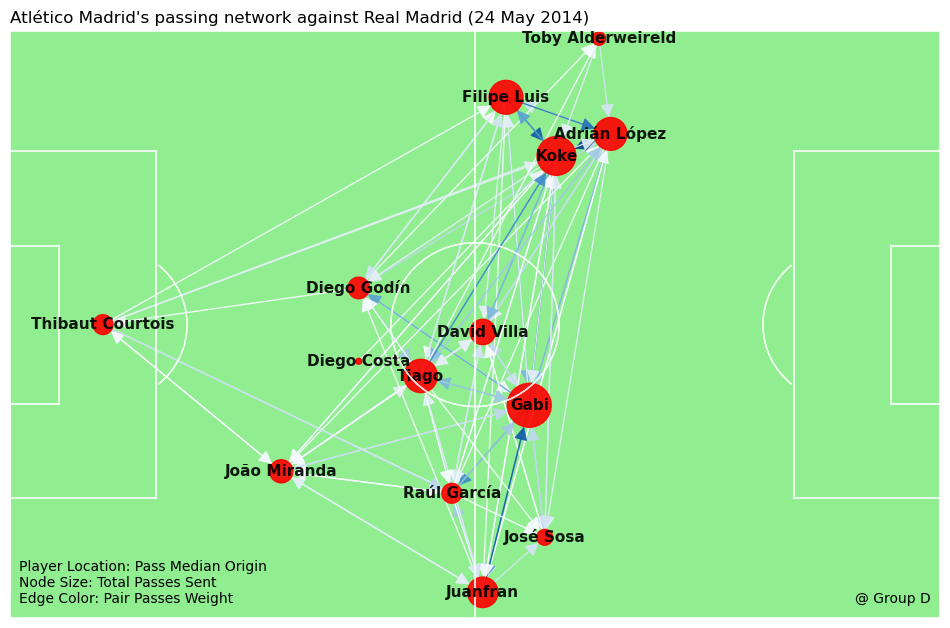

In [24]:
player_position = player_positionATM.copy()
player_pass_count = player_pass_countATM.copy()
g=GATM.copy()

backgroundcolor = "lightgreen"
linescolor = "white"
figsize = 12
width = 105
height = 68

player_position_graph = player_position.copy()
player_position_graph["origin_pos_y"] = player_position_graph["origin_pos_y"]*height
player_position_graph["origin_pos_x"] = player_position_graph["origin_pos_x"]*width

player_position_graph = player_position_graph.reset_index()
pos = player_position_graph.set_index('player_name').T.to_dict('list')
pos # positions based on player median pass position

player_pass_count["Passes Normalized"] = player_pass_count["Number of Passes Sent"]/player_pass_count["Number of Passes Sent"].max()

ax = draw_pitch()

opponent_team = [x for x in df_events.team_name.unique() if x != team_name1][0]
title ="{0}'s passing network against {1} (24 May 2014)".format(team_name1, opponent_team)
ax.set_title(title, loc="left")

legend = "Player Location: Pass Median Origin\nNode Size: Total Passes Sent\nEdge Color: Pair Passes Weight"
ax.annotate(legend, xy=(0.01*width, 0.02*height), ha="left", va="bottom", zorder=7, fontsize=10)

ax.annotate("@ Group D", xy=(0.99*width, 0.02*height), ha="right", va="bottom", zorder=7, fontsize=10)

nx.draw_networkx(
    g, 
    pos, # positions defined above
    with_labels=True,
    horizontalalignment='center',
    font_weight='bold',
    font_size=11,
    node_size= 1000 * player_pass_count["Passes Normalized"],  # node size by passes sent
    node_color= "Red",
    alpha = 0.9,
    edge_color=pair_passATM.iloc[:,2], # color edges by pair passes weight
    edge_cmap=plt.cm.Blues,
    arrowsize=20,
    )

### 3.4. b)  Real Madrid - Graph Visualization

In the graph we highlight the location of the nodes defined by the median average pass location from each player, the size of the nodes defined by the number of total passes sent and the color of the edges defined by the weight of the passes between the pair. 

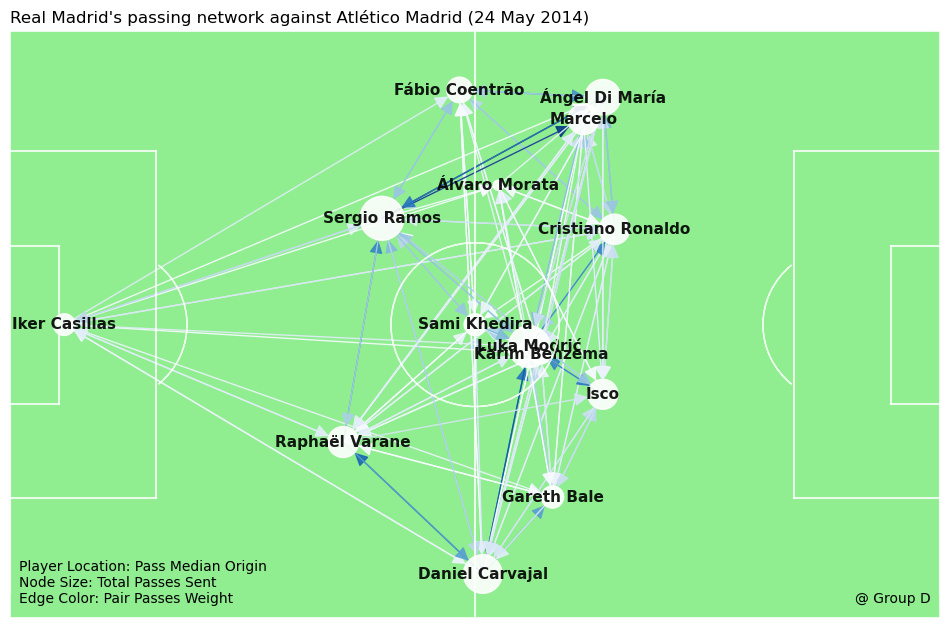

In [25]:
player_position = player_positionRMA.copy()
player_pass_count = player_pass_countRMA.copy()
g=GRMA.copy()

backgroundcolor = "lightgreen"
linescolor = "white"
figsize = 12
width = 105
height = 68

player_position_graph = player_position.copy()
player_position_graph["origin_pos_y"] = player_position_graph["origin_pos_y"]*height
player_position_graph["origin_pos_x"] = player_position_graph["origin_pos_x"]*width

player_position_graph = player_position_graph.reset_index()
pos = player_position_graph.set_index('player_name').T.to_dict('list')
pos # positions based on player median pass position

player_pass_count["Passes Normalized"] = player_pass_count["Number of Passes Sent"]/player_pass_count["Number of Passes Sent"].max()

ax = draw_pitch()

opponent_team = [x for x in df_events.team_name.unique() if x != team_name2][0]
title ="{0}'s passing network against {1} (24 May 2014)".format(team_name2, opponent_team)
ax.set_title(title, loc="left")

legend = "Player Location: Pass Median Origin\nNode Size: Total Passes Sent\nEdge Color: Pair Passes Weight"
ax.annotate(legend, xy=(0.01*width, 0.02*height), ha="left", va="bottom", zorder=7, fontsize=10)

ax.annotate("@ Group D", xy=(0.99*width, 0.02*height), ha="right", va="bottom", zorder=7, fontsize=10)

nx.draw_networkx(
    g, 
    pos, # positions defined above
    with_labels=True,
    horizontalalignment='center',
    font_weight='bold',
    font_size=11,
    node_size= 1000 * player_pass_count["Passes Normalized"], # node size by passes sent
    node_color= "white",
    alpha = 0.9,
    edge_color=pair_passRMA.iloc[:,2], # color edges by pair passes weight
    edge_cmap=plt.cm.Blues,
    arrowsize=20,
    )

### 3.5 Centrality Measures

Centrality defines how important a node is within a network. Below some definitions of different metrics used which will be further analyzed later.

***Degree centrality:*** defines central nodes are those that have most links with other nodes. In directed graphs the degree centrality is defined based only in the out-degree.

***Eigenvector centrality:*** generalizes degree centrality by incorporating the importance of the neighbors.

***Closeness centrality:*** an actor 𝐼 is central if it can easily interact with all other actors, that is the distance 𝑑(𝑖,𝑗) to all other actors 𝑗 is short. Closeness centrality indicates how close a node is to all other nodes in the network. It is calculated as inverse of the average of the shortest path length from the node to every other node in the network.

***Betweennes centrality:*** central actors are those that have “control” of other pairs of actors. Betweenness centrality measures the extent to which a vertex lies on shortest paths between other vertices. Vertices with high betweenness may have considerable influence within a network.

### 3.5. a)  Atlético de Madrid - Centrality Measures

In [26]:
#In Degree
centrality_measures = pd.DataFrame(GATM.in_degree(), columns=['player_name', 'In Degree']).set_index('player_name')\
                                                                            .sort_values(['In Degree'], ascending=False)

#Out degree
centrality_measures["Out degree"] = pd.DataFrame(GATM.out_degree(), columns=['player_name', 'In Degree']).set_index('player_name')\
                                                                            .sort_values(['In Degree'], ascending=False)

#Total Degree
centrality_measures["Total Degree"] = pd.DataFrame(nx.degree(GATM), columns=['player_name', 'In Degree']).set_index('player_name')\
                                                                            .sort_values(['In Degree'], ascending=False)

centrality_measures['Degree Normalized'] = pd.DataFrame.from_dict(nx.degree_centrality(GATM), orient= 'index').iloc[:,0].round(2)
centrality_measures['Betweenness Normalized'] = pd.DataFrame.from_dict(nx.betweenness_centrality(GATM), orient= 'index').iloc[:,0].round(2)
centrality_measures['Closeness Normalized'] = pd.DataFrame.from_dict(nx.closeness_centrality(GATM), orient= 'index').iloc[:,0].round(2)
centrality_measures['Eigenvector'] = pd.DataFrame.from_dict(nx.eigenvector_centrality(GATM), orient= 'index').iloc[:,0].round(2)

centrality_measures_GATM = pd.merge(player_pass_countATM, centrality_measures, on='player_name')\
                             .sort_values(['Number of Passes Sent'], ascending=False)
centrality_measures_GATM

,Number of Passes Sent,In Degree,Out degree,Total Degree,Degree Normalized,Betweenness Normalized,Closeness Normalized,Eigenvector
player_name,,,,,,,,
Gabi,54,10,10,20,1.54,0.07,0.81,0.38
Koke,42,12,10,22,1.69,0.19,0.93,0.37
Filipe Luis,32,6,7,13,1.00,0.02,0.65,0.22
Tiago,31,8,11,19,1.46,0.08,0.72,0.31
Adrián López,30,10,8,18,1.38,0.05,0.81,0.33
Juanfran,26,7,8,15,1.15,0.02,0.68,0.29
David Villa,18,8,6,14,1.08,0.02,0.72,0.32
João Miranda,15,6,8,14,1.08,0.05,0.65,0.23
Diego Godín,13,5,6,11,0.85,0.06,0.62,0.21


We can see in the table above different centrality measures and the folowing conclusion can be made:
  
  - Gabi has the higher number of passes sent (54). Then 54 is the denominator for calculation of all passes normalized scores.
  - Since the total number of players is 14, the maximum in-degree and out-degree is 13 for each player, and the maximum total degree 26. We should mention also that the out-degree (number of different players to which passes were sent) needs to be lower than he first column number of passes sent.
  - Koke has the maximum in-degree (12) and maximum total degree (22), while Tiago has the higher out-degree (11). This mean Koke reaceived passes from a higher number of different players while Tiago was the player sending passes to a higher number os different players. Taking into consideration the definition for directed graphs, Tiago would have the highest degree centrality instead of Koke.
  - Diego Costa number of passes (1) is explained by the fact he was injured in the beginning of the game and was substituted in minute 9 of the game by Adrian López.

### 3.5. b)  Real Madrid - Centrality Measures

In [27]:
#In Degree
centrality_measures = pd.DataFrame(GRMA.in_degree(), columns=['player_name', 'In Degree']).set_index('player_name')\
                                                                            .sort_values(['In Degree'], ascending=False)

#Out degree
centrality_measures["Out degree"] = pd.DataFrame(GRMA.out_degree(), columns=['player_name', 'In Degree']).set_index('player_name')\
                                                                            .sort_values(['In Degree'], ascending=False)

#Total Degree
centrality_measures["Total Degree"] = pd.DataFrame(nx.degree(GRMA), columns=['player_name', 'In Degree']).set_index('player_name')\
                                                                            .sort_values(['In Degree'], ascending=False)

centrality_measures['Degree Normalized'] = pd.DataFrame.from_dict(nx.degree_centrality(GRMA), orient= 'index').iloc[:,0].round(2)
centrality_measures['Betweenness Normalized'] = pd.DataFrame.from_dict(nx.betweenness_centrality(GRMA), orient= 'index').iloc[:,0].round(2)
centrality_measures['Closeness Normalized'] = pd.DataFrame.from_dict(nx.closeness_centrality(GRMA), orient= 'index').iloc[:,0].round(2)
centrality_measures['Eigenvector'] = pd.DataFrame.from_dict(nx.eigenvector_centrality(GRMA), orient= 'index').iloc[:,0].round(2)


centrality_measures_GRMA = pd.merge(player_pass_countRMA, centrality_measures, on='player_name')\
                             .sort_values(['Number of Passes Sent'], ascending=False)
centrality_measures_GRMA

,Number of Passes Sent,In Degree,Out degree,Total Degree,Degree Normalized,Betweenness Normalized,Closeness Normalized,Eigenvector
player_name,,,,,,,,
Sergio Ramos,94,10,11,21,1.62,0.04,0.81,0.28
Luka Modrić,85,11,12,23,1.77,0.03,0.87,0.31
Daniel Carvajal,73,12,12,24,1.85,0.05,0.93,0.33
Ángel Di María,62,12,10,22,1.69,0.04,0.93,0.32
Raphaël Varane,47,10,11,21,1.62,0.03,0.81,0.28
Marcelo,46,8,9,17,1.31,0.01,0.72,0.25
Cristiano Ronaldo,45,12,13,25,1.92,0.07,0.93,0.32
Isco,44,10,8,18,1.38,0.02,0.81,0.29
Fábio Coentrão,32,8,6,14,1.08,0.00,0.72,0.23


We can see in the table above different centrality measures and the folowing conclusion can be made:

 - Sérgio Ramos has the higher number of passes sent (94). Then 94 is the denominator for calculation of all passes normalized scores.
 - Since the total number of players is 14, the maximum in-degree and out-degree is 13 for each player, and the maximum total degree 26. We should mention also that the out-degree (number of different players to which passes were sent) needs to be lower than he first column number of passes sent.
 - 3 players (Carvajal, Di Maria and Cristiano) share the maximum in-degree (12), while Cristiano Ronaldo has alone the maximum out-degree (13) which gives him a total degree of 25 meaning there was only 1 player to which he did not receive a pass from which from the adjacency table we can see it was Khedira who was substituted at minute 59.
 - Álvaro Morata lower number of passes (5) is explained by the fact he got in the game only at minute 79 substituting Karim Benzema.

-------

### 3.6. Combined Metrics Analysis

After merging both data frames with the centrality measures for both teams we can start comparing how they impacted the events in the game. Some considerations but be made before going on:

 - First, we have to take into account that in this game, Real Madrid completed 623 passes and Atlético de Madrid completed 296 passes. Although not directly, the fact that Real Madrid has more than twice the completed passes of Atletico will be reflected in the values of the centrality measures. 
     - Influencing this difference in passes was the evolution of the result, with Real Madrid loosing the game since minute 36 until minute 93 so more looking to score a goal at least in most of the game.
 - Substitutions perfomed by each team affect centrality metrics as if a player stays a low amount of time in the game he has less time to connect with other players and also these other players have less probability of connecting with him. 
     - As already mentioned an early substitution happenned with Diego Costa from Atletico de Madrid being substituted in minute 9 of the game by Adrian López, with the result of only Koke being able to connect with him.
     
     
Information about all substitutions: 
 - Atlético de Madrid: 9min (Diego Costa out, Adrian López in), 66min (Raúl Garcia out, José Sosa in), 83min (Filipe Luis out, Toby Alderweireld in).
 - Real Madrid: 59min (Fábio Coentrão and Sami Khedira out, Marcelo and Isco in), 79min (Karim Benzema out and Alvaro Morata in).

In [28]:
centrality_measures_GRMA["Team"] = "RMA"
centrality_measures_GATM["Team"] = "ATM"
centrality_measures_concat = pd.concat([centrality_measures_GRMA, centrality_measures_GATM])

### 3.6. a) Sorting by Degree Normalized

In [29]:
centrality_measures_total = centrality_measures_concat.sort_values(['Degree Normalized'], ascending=False)

def highlight_col(x):
    #copy df to new - original data are not changed
    centrality_measures_total = x.copy()
    #set by condition
    mask = centrality_measures_total['Team'] == "ATM"
    centrality_measures_total.loc[mask, :] = 'background-color: red'
    centrality_measures_total.loc[~mask,:] = 'background-color: white'
    return centrality_measures_total 

centrality_measures_events = centrality_measures_total.style.apply(highlight_col,axis=None)
centrality_measures_events

,Number of Passes Sent,In Degree,Out degree,Total Degree,Degree Normalized,Betweenness Normalized,Closeness Normalized,Eigenvector,Team
player_name,,,,,,,,,
Cristiano Ronaldo,45,12,13,25,1.920000,0.070000,0.930000,0.320000,RMA
Daniel Carvajal,73,12,12,24,1.850000,0.050000,0.930000,0.330000,RMA
Luka Modrić,85,11,12,23,1.770000,0.030000,0.870000,0.310000,RMA
Ángel Di María,62,12,10,22,1.690000,0.040000,0.930000,0.320000,RMA
Koke,42,12,10,22,1.690000,0.190000,0.930000,0.370000,ATM
Sergio Ramos,94,10,11,21,1.620000,0.040000,0.810000,0.280000,RMA
Raphaël Varane,47,10,11,21,1.620000,0.030000,0.810000,0.280000,RMA
Gabi,54,10,10,20,1.540000,0.070000,0.810000,0.380000,ATM
Karim Benzema,20,10,9,19,1.460000,0.020000,0.810000,0.280000,RMA


The combined dataframe is sorted by degree centrality normalized, which means players were sorted by the interaction they have within their network, with top players (nodes) in the list being the ones that have the most links (connections) with other players. 

Main conclusions:
 - In our case, the value for degree normalized is the same as dividing the total degree by 13, which gives a maximum of 2 if a player achieved the maximum total degree of 26 which did not happen (the closer was Cristiano Ronaldo with 25). If only using out-degree the maximum would be 1 which would be achieved only by Cristiano Ronaldo and remaining conclusions would be similar.
 - By loooking at the number os passes sent we can see clearly it has no direct implication in centrality as Sérgio Ramos with 94 passes is only in 6th place.
 - Out of the 10 players with the highest degree centrality, 7 played for Real Madrid and 3 for Atlético, this informs that Real Madrid players were more connected.

### 3.6. b) Sorting by Eigenvector Centrality

In [30]:
centrality_measures_total = centrality_measures_concat.sort_values(['Eigenvector'], ascending=False)

def highlight_col(x):
    #copy df to new - original data are not changed
    centrality_measures_total = x.copy()
    #set by condition
    mask = centrality_measures_total['Team'] == "ATM"
    centrality_measures_total.loc[mask, :] = 'background-color: red'
    centrality_measures_total.loc[~mask,:] = 'background-color: white'
    return centrality_measures_total 

centrality_measures_events = centrality_measures_total.style.apply(highlight_col,axis=None)
centrality_measures_events

,Number of Passes Sent,In Degree,Out degree,Total Degree,Degree Normalized,Betweenness Normalized,Closeness Normalized,Eigenvector,Team
player_name,,,,,,,,,
Gabi,54,10,10,20,1.540000,0.070000,0.810000,0.380000,ATM
Koke,42,12,10,22,1.690000,0.190000,0.930000,0.370000,ATM
Daniel Carvajal,73,12,12,24,1.850000,0.050000,0.930000,0.330000,RMA
Adrián López,30,10,8,18,1.380000,0.050000,0.810000,0.330000,ATM
Ángel Di María,62,12,10,22,1.690000,0.040000,0.930000,0.320000,RMA
Cristiano Ronaldo,45,12,13,25,1.920000,0.070000,0.930000,0.320000,RMA
David Villa,18,8,6,14,1.080000,0.020000,0.720000,0.320000,ATM
Luka Modrić,85,11,12,23,1.770000,0.030000,0.870000,0.310000,RMA
Raúl García,11,8,5,13,1.000000,0.010000,0.720000,0.310000,ATM


Eigenvector centrality is more sophisticated than the degree centrality as it measures the influence of each node in the network. Two factors positively impact the value of this metric, a higher number of direct connections with other players and to be connected with other nodes which also have a high centrality. In this sense, important players are highly connected to other important players of their team.

Main conclusions:
  - From the 10 top players with higher eigenvector centrality, 6 played for Atlético and 4 for Real Madrid, the distribution here is more balanced, but this tells us that Atlético players with a higher weight in the team, tend to directly connect more within each other. In other words, Atlético top players network's importance is more centred on their most relevant players which on average accumulate more importance than the Real Madrid players with higher importance.

This metric can be used by both teams to adjust their strategy:
* Real Madrid could focus on covering the important  Atlético players and avoid these connections by breaking the interactions between this main core of nodes. 
* Atlético could change the strategy and try to balance the importance of its network by encouraging the important players to interact more with players with lower eigenvector centrality that play in closer positions, increasing the importance for these players and making a better distribution of the importance in their network.

### 3.6. c) Sorting by Closeness Normalized

In [31]:
centrality_measures_total = centrality_measures_concat.sort_values(['Closeness Normalized'], ascending=False)

def highlight_col(x):
    #copy df to new - original data are not changed
    centrality_measures_total = x.copy()
    #set by condition
    mask = centrality_measures_total['Team'] == "ATM"
    centrality_measures_total.loc[mask, :] = 'background-color: red'
    centrality_measures_total.loc[~mask,:] = 'background-color: white'
    return centrality_measures_total 

centrality_measures_events = centrality_measures_total.style.apply(highlight_col,axis=None)
centrality_measures_events

,Number of Passes Sent,In Degree,Out degree,Total Degree,Degree Normalized,Betweenness Normalized,Closeness Normalized,Eigenvector,Team
player_name,,,,,,,,,
Daniel Carvajal,73,12,12,24,1.850000,0.050000,0.930000,0.330000,RMA
Ángel Di María,62,12,10,22,1.690000,0.040000,0.930000,0.320000,RMA
Koke,42,12,10,22,1.690000,0.190000,0.930000,0.370000,ATM
Cristiano Ronaldo,45,12,13,25,1.920000,0.070000,0.930000,0.320000,RMA
Luka Modrić,85,11,12,23,1.770000,0.030000,0.870000,0.310000,RMA
Sergio Ramos,94,10,11,21,1.620000,0.040000,0.810000,0.280000,RMA
Karim Benzema,20,10,9,19,1.460000,0.020000,0.810000,0.280000,RMA
Adrián López,30,10,8,18,1.380000,0.050000,0.810000,0.330000,ATM
Gabi,54,10,10,20,1.540000,0.070000,0.810000,0.380000,ATM


Closeness centrality gives us an idea on how close and well-connected  the nodes are within a network. It helps us detect those nodes which are able to spread information through its network more efficiently, therefore, players with a higher closeness centrality have a higher impact on the passing network in terms of moving the ball more efficiently among the passing network.

Main conclusions:

 - 8 out of the 10 players with higher closeness centrality are Real Madrid players, this defines that their players were more easily reachable during the game than Atlético players.

### 3.6. d) Sorting by Betweenness Normalized

In [32]:
centrality_measures_total = centrality_measures_concat.sort_values(['Betweenness Normalized'], ascending=False)

def highlight_col(x):
    #copy df to new - original data are not changed
    centrality_measures_total = x.copy()
    #set by condition
    mask = centrality_measures_total['Team'] == "ATM"
    centrality_measures_total.loc[mask, :] = 'background-color: red'
    centrality_measures_total.loc[~mask,:] = 'background-color: white'
    return centrality_measures_total 

centrality_measures_events = centrality_measures_total.style.apply(highlight_col,axis=None)
centrality_measures_events

,Number of Passes Sent,In Degree,Out degree,Total Degree,Degree Normalized,Betweenness Normalized,Closeness Normalized,Eigenvector,Team
player_name,,,,,,,,,
Koke,42,12,10,22,1.690000,0.190000,0.930000,0.370000,ATM
Tiago,31,8,11,19,1.460000,0.080000,0.720000,0.310000,ATM
Gabi,54,10,10,20,1.540000,0.070000,0.810000,0.380000,ATM
Cristiano Ronaldo,45,12,13,25,1.920000,0.070000,0.930000,0.320000,RMA
Diego Godín,13,5,6,11,0.850000,0.060000,0.620000,0.210000,ATM
Daniel Carvajal,73,12,12,24,1.850000,0.050000,0.930000,0.330000,RMA
João Miranda,15,6,8,14,1.080000,0.050000,0.650000,0.230000,ATM
Adrián López,30,10,8,18,1.380000,0.050000,0.810000,0.330000,ATM
Sergio Ramos,94,10,11,21,1.620000,0.040000,0.810000,0.280000,RMA


Betweenness doesn't measure how well-connected a player is in the network, but how the passing/ball flow depends on that particular player.

In the passing network, this metric measures the impact of removing that player from the game, the lower this metric, the less involved the player is in the game.

From a tactical point of view, a team should always seek betweenness scores that are evenly distributed among their players. Having high betweenness scores concentrated in few players indicates a dependency on a few important players.

Teams with low betweenness scores are teams with a well balanced passing strategy.

Main conclusions:

 - 4 out of the top 5 players with higher betweenness centrality were Atlético player, we can say that Real Madrid players were more equally involved in the game sharing the node importance more evenly between them.

### 3.6. e) PageRank Centrality

PageRank (PR) is an algorithm used by Google Search to rank web pages in their search engine results. PageRank is a way of measuring the importance of website pages.

PageRank follows the following intuitive idea:
 - The links to page 𝐼 is a conveyance of prestige ( authority ) of the page
 - The more in links a page 𝐼 receives , the more prestige the page 𝐼 has
 - The pages that link to page 𝐼also have their own prestige score
 - A page of a higher prestige pointing to 𝐼 is more important than a page of a lower prestige pointing to 𝐼

So, in the end, a page is important if it is pointed to by other important pages.

In [33]:
#Atlético de Madrid
pagerank = nx.pagerank(GATM, weight="weight")
pagerankGATM = pd.DataFrame(pagerank.items(),columns=["Player","Pagerank_coeff"]).sort_values(by=["Pagerank_coeff"],ascending=False)

#Real Madrid
pagerank = nx.pagerank(GRMA, weight="weight")
pagerankGRMA = pd.DataFrame(pagerank.items(),columns=["Player","Pagerank_coeff"]).sort_values(by=["Pagerank_coeff"],ascending=False)

#Merge
pagerankGRMA["Team"] = "RMA"
pagerankGATM["Team"] = "ATM"
pagerank_concat = pd.concat([pagerankGATM, pagerankGRMA])

pagerank_total = pagerank_concat.sort_values(['Pagerank_coeff'], ascending=False)
pagerank_total

def highlight_col(x):
    #copy df to new - original data are not changed
    pagerank_total = x.copy()
    #set by condition
    mask = pagerank_total["Team"] == "ATM"
    pagerank_total.loc[mask, :] = 'background-color: red'
    pagerank_total.loc[~mask,:] = 'background-color: white'
    return pagerank_total 

pagerank_total_sorted = pagerank_total.reset_index(drop=True).style.apply(highlight_col,axis=None)
pagerank_total_sorted

,Player,Pagerank_coeff,Team
0,Koke,0.179412,ATM
1,Gabi,0.150903,ATM
2,Adrián López,0.138575,ATM
3,Ángel Di María,0.124026,RMA
4,Luka Modrić,0.121680,RMA
5,Sergio Ramos,0.104258,RMA
6,Cristiano Ronaldo,0.098627,RMA
7,Tiago,0.097100,ATM
8,Daniel Carvajal,0.086873,RMA
9,David Villa,0.083140,ATM


Pagerank in a football passes network can be defined as popularity or importance in the sense that a player is popular if he receives passes from other popular players.

Pagerank centrality assigns to each player the probability that he will have the ball after a few passes have been made, the score of a player depends on the scores of all his teammates.

The 3 players with a higher pagerank coefficient are Atlético players which capture considerably high values if we compare them with the rest of the players in their team. This is telling us that the important players in Atlético were connecting more between each other concentrating the importance distribution between them.


### 3.6. f) Transitivity & Clustering Coefficient

Transitivity is the overall probability for the network to have adjacent nodes interconnected, thus revealing the existence of tightly connected communities (or clusters, subgroups, cliques). It is calculated by the ratio between the observed number of closed triplets and the maximum possible number of closed triplets in the graph. Complex networks and notably small-world networks often have a high transitivity and a low diameter.

The local clustering coefficient , 𝑐𝑙(𝑣), gives for node 𝑣the proportion of neighbors of 𝑣 that are also connected to each other.

Transitivity identify what is the percentage of edges that have a shared vertex in our graph
he reciprocity of a directed graph is defined as the ratio of the number of edges pointing in both directions to the total number of edges in the graph. Formally,
In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together.

In [34]:
# Atlético de Madrid metrics:
# GATM = Directed graph ATM
GATM_TR = round(nx.transitivity(GATM),3)
GATM_RC = round(nx.reciprocity(GATM),3)
GATM_CL = round(nx.average_clustering(GATM),3)
GATM_SPL = round(nx.average_shortest_path_length(GATM),3)

# Real Madrid metrics
# GRMA = Directed graph RMA
GRMA_TR = round(nx.transitivity(GRMA),3)
GRMA_RC = round(nx.reciprocity(GRMA),3)
GRMA_CL = round(nx.average_clustering(GRMA),3)
GRMA_SPL = round(nx.average_shortest_path_length(GRMA),3)

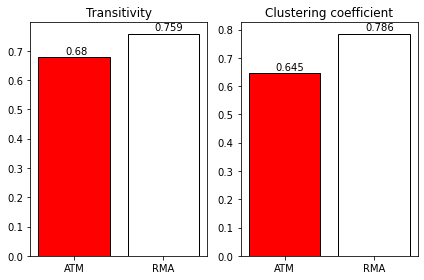

In [35]:
height_TR = [GATM_TR,GRMA_TR]
height_CL = [GATM_CL,GRMA_CL]
bars = ("ATM", "RMA")
y_pos = range(len(bars))

plt.subplot(1,2,1)

#Plotting Transitivity
plt.bar(y_pos, height_TR,color= ["red","white"],edgecolor= ["black"])
plt.title('Transitivity')
plt.xticks(y_pos, bars)
for i, v in enumerate(height_TR):
    plt.text(i - 0.10, v + 0.01, str(v))

#Plotting Clustering coefficient
plt.subplot(1,2,2)
plt.bar(y_pos, height_CL,color= ["red","white"],edgecolor= ["black"])
plt.title('Clustering coefficient')
plt.xticks(y_pos, bars)
for i, v in enumerate(height_CL):
    plt.text(i - 0.10, v + 0.01, str(v))
    
plt.tight_layout()
plt.show()

Clustering coefficient indicates the transitivity of a network, in a passing network if player A wants to pass the ball to Player B, but this passing line is well covered, A will need to go through C to reach B, creating a path A -> C -> B, translating C as the middle player creating this connection who will have a high clustering coefficient.

It is interesting to study how tightly the players interact in a team, clustering is a measure that inform us of the degree in which the nodes in network tend to cluster together.

The global average clustering coefficient and transitivity for Real Madrid is higher than for the one between Atlético players, this translates in Atlético having a less balanced amount of passes involved in team.

### 3.6. g) Reciprocity

Reciprocity is a simplified version of transitivity, because it considers closed loops of length 2, which can only happen in
directed graphs. Formally, if node v is connected to node u, u by connecting to v exhibits reciprocity.

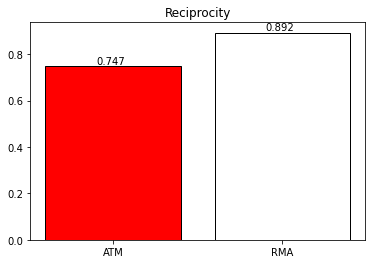

In [36]:
height = [GATM_RC,GRMA_RC]
bars = ("ATM", "RMA")

# Create bars and choose color
plt.bar(y_pos, height,color= ["red","white"],edgecolor= ["black"])
 
# Add title and axis names
plt.title('Reciprocity')

# Create names
plt.xticks(y_pos, bars)

for i, v in enumerate(height):
    plt.text(i - 0.10, v + 0.01, str(v))
    
reciprocity_plt = plt
reciprocity_plt.show()

The reciprocity of a directed graph is defined as the ratio of the number of edges pointing in both directions to the total number of edges in the graph.

This can be translated as the ratio between the total number of passing lines which are bidirectional between two players and the total number of connections in the graph.

We can say that out of the total number of pass connections between the Real Madrid players, nearly 90% of them are completed by both players in both directions and for Atlético a 75% oh all their passing lines.

### 3.6. h) Shortest Path Length

Average path length is a concept in network topology that is defined as the average number of steps along the shortest paths for all possible pairs of network nodes. It is a measure of the efficiency of information or mass transport on a network.

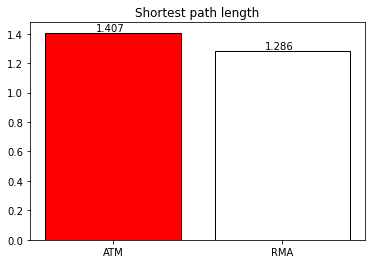

In [37]:
height = [GATM_SPL,GRMA_SPL]
bars = ("ATM", "RMA")

# Create bars and choose color
plt.bar(y_pos, height,color= ["red","white"],edgecolor= ["black"])
 
# Add title and axis names
plt.title('Shortest path length')

# Create names
plt.xticks(y_pos, bars)

for i, v in enumerate(height):
    plt.text(i - 0.10, v + 0.01, str(v))
    
SPL_plt = plt

plt.show()

In a passing network, the shortest path length d is the minimum number of players that must be traversed by the ball to go from one player to any other.

In this case, having a low average shortest-path length is an indicator of a better connection between players, since the ball can travel from a player to other in a lower number of steps on average. 

As in previous metrics, we conclude that Real Madrid players were on average better connected in this final.

-------

## Part 4: Conclusion

We were fascinated by our study and visualization of Atlético de Madrid and Real Madrid passing channels over the course of the Champions League final held on 24 of May of 2014. 

Very interesting conclusions can be made about the players importance in the match which translates the utility of passing networks from the point of view of a tactical analyst for example. This analysis helped us to understand the differences between number of passes ("quantity") and other measures ("quality") and the importance of social network analysis.

On an individual level, Cristiano Ronaldo and Daniel Carvajal on Real Madrid side, and Gabi and Koke on Atlético de Madrid side were the players with better centrality measures indicating more connections and importance during the match.

On a team level the higher transivity, clustering coefficient and reciprocity by Real Madrid, as well as lower shortest path length translate in more balanced passes between the different players, which is understandable taking into consideration Real Madrid was loosing since minute 36 until minute 93 and had a much higher possesion of the ball and total amount of passes.

Higher eigenvector, betweenness and pagerank values concentrated in few players, higher dispersion, which Atlético showed with Gabi and Koke, generally indicates a dependency on a few important players and could be used by both teams to adjust their strategy:
 - Real Madrid could focus on covering Gabi and Koke and avoid these critical connections showed during this match.
 - Atlético could change the strategy and try to balance the importance of its network.
 
However, it is worth looking beyond the differences in the network metrics and trying to find the reasons behind them. Since Atlético was winning the game it is understandable that they had less amount of passes by trying to explore fast counter-attacks to score a second goal and also trying to pass the ball more to their creative players who can easily maintain the ball and execute decisive passes. Also it was expected a higher pressure from the Real Madrid players in order to recover from the disadvantage in the result, so it was harder for Atlético to pass the ball between defenders for example.

Further studies comparing different matches with different score evolution would be of interesting analyis but stand out of the scope of our current work and stand for further research later. This notebook can be used as template as this analysis can be easily replicated to other matches by only by changing the match_id and teams names if using the same data source.